# Экономика банановой республики

Описание роста экономики

* Объём производства $O(t) = 100 \cdot \sqrt{M(t)}$

* Инвестиции $I(t) = s \cdot O(t)$

* Баланс потребления и инвестиций $O(t) = C(t) + I(t)$

* Баланс инвестиций и амортизации $M(t+1) = M(t) + I(t) - d\cdot M(t)$

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
class BananaRepublic:
    def __init__(self, s = 0.2, d = 0.1, workforce = 10000, M_0 = 100):
        self.s = s
        self.d = d
        self.workforce = workforce
        self.M = []
        if M_0 is not None:
            self.M.append(M_0)
        self.O = []
        self.I = []
        self.C = []
        self.time = [0]
         
    def update(self):
        self.O.append(int(np.sqrt(self.workforce * self.M[-1])))
        self.I.append(self.s * self.O[-1])
        self.C.append(self.O[-1] - self.I[-1])
        self.M.append(int(self.M[-1] * (1 - self.d) + self.I[-1]))
        if len(self.time) == 0:
            self.time.append(0)
        else:
            self.time.append(self.time[-1] + 1)
            
    def calcBalance(self):
        return self.workforce * self.s / self.d        

Посмотрим на изменение объёма производства со временем и сравним с балансом согласно модели Солоу

$
\begin{equation}
    O^* = L \cdot \dfrac{s}{d}
\end{equation}
$


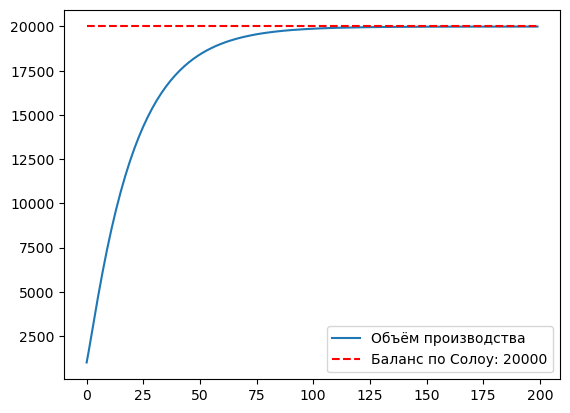

In [75]:
rep = BananaRepublic()

for _ in range(200):
    rep.update()
    
pred_line = (np.array([rep.calcBalance()] * len(rep.time[:-1])))
    
plt.plot(rep.time[:-1], rep.O, label="Объём производства")
plt.plot(rep.time[:-1], pred_line, '--r', label=f'Баланс по Солоу: {int(rep.calcBalance())}')
plt.legend()
plt.show()

Попробуем найти примерный момент, когда настигает равновесие. Пусть это момент, когда относительная разница между текущим объёмом и предсказанным балансом не больше 0.1%

In [76]:
diff = np.abs(pred_line - np.array(rep.O)) / pred_line

eps = 0.001

timeMoment = np.where(diff < eps)[0][0]

vertLine = [np.min(rep.O), np.max(rep.O)]

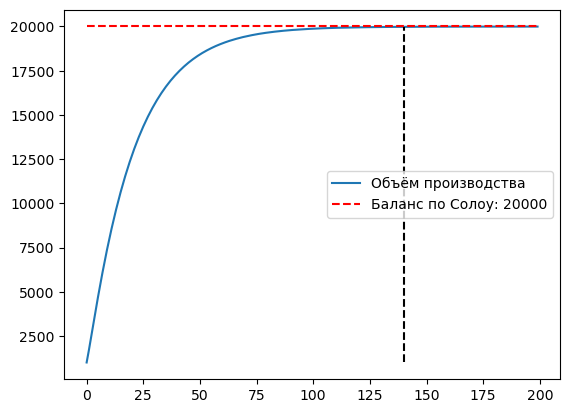

In [77]:
plt.plot(rep.time[:-1], rep.O, label="Объём производства")
plt.plot(rep.time[:-1], pred_line, '--r', label=f'Баланс по Солоу: {int(rep.calcBalance())}')
plt.plot([timeMoment, timeMoment], vertLine, '--k')
plt.legend()
plt.show()

Посмотрим на поведение объёма при разных $s$, зададим точность $0.01\%$

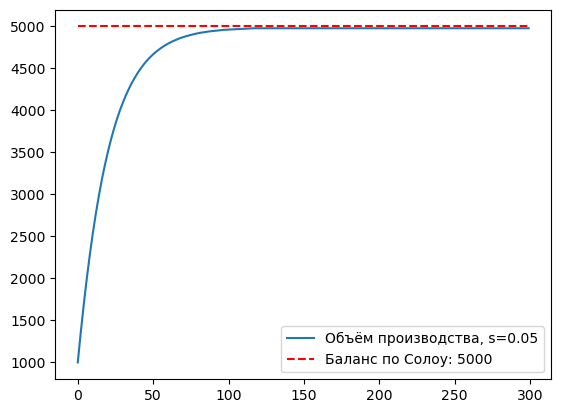

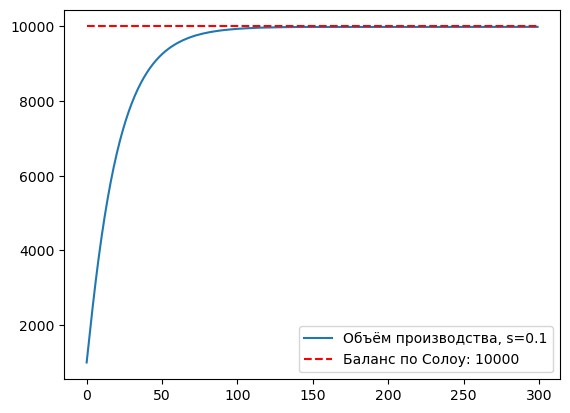

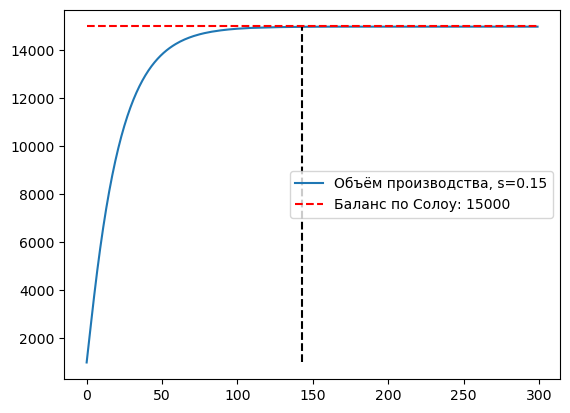

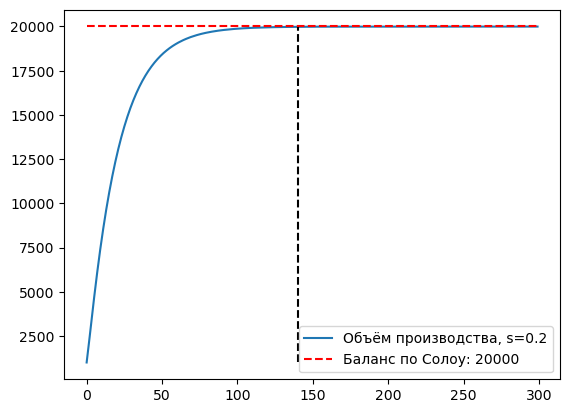

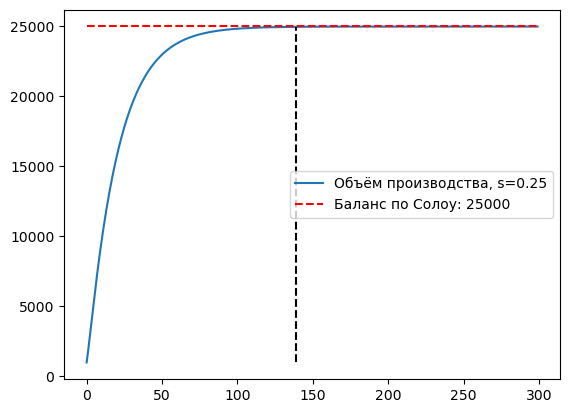

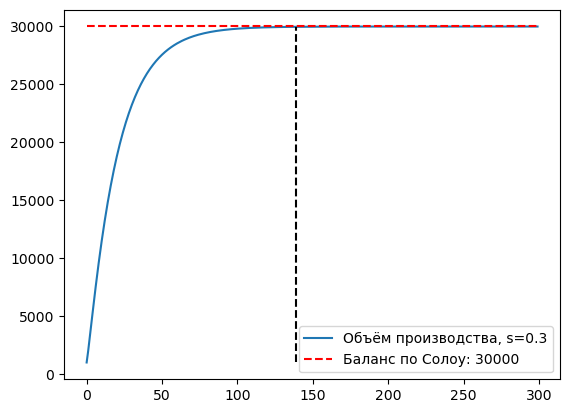

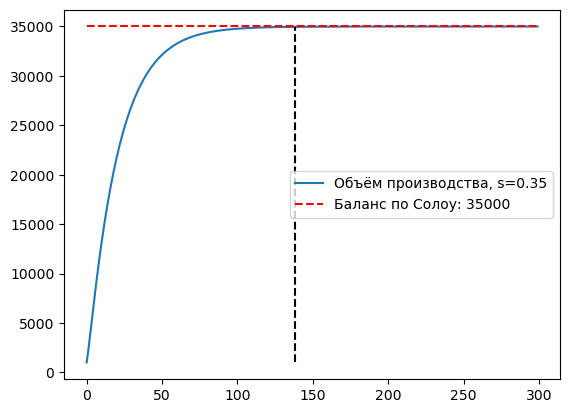

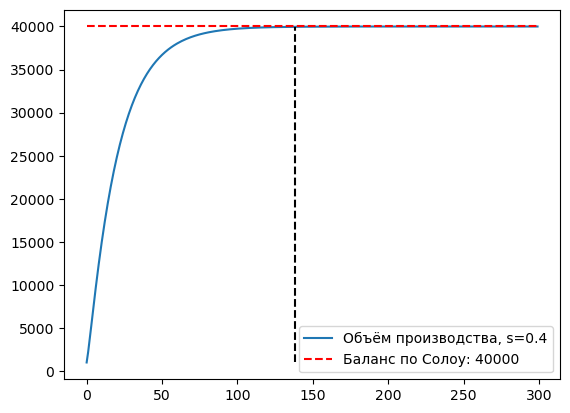

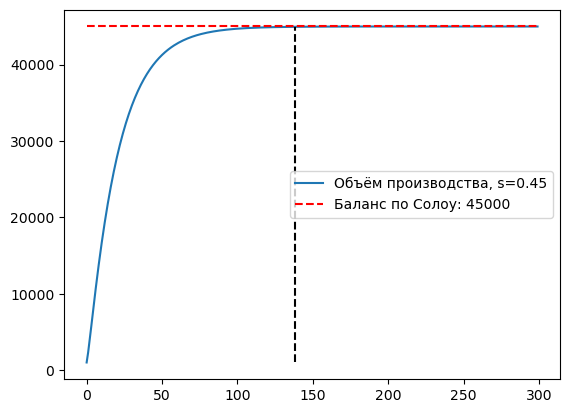

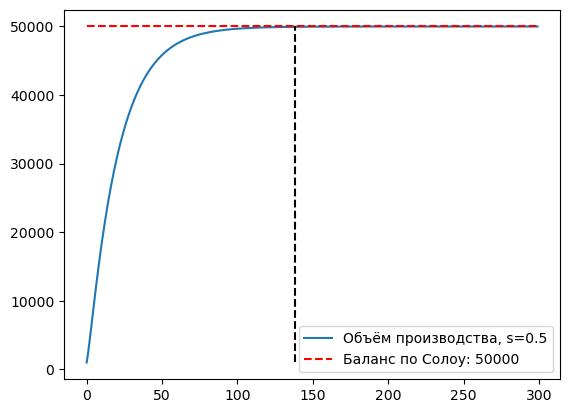

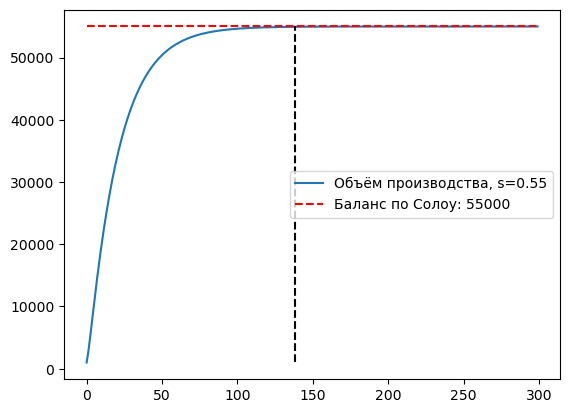

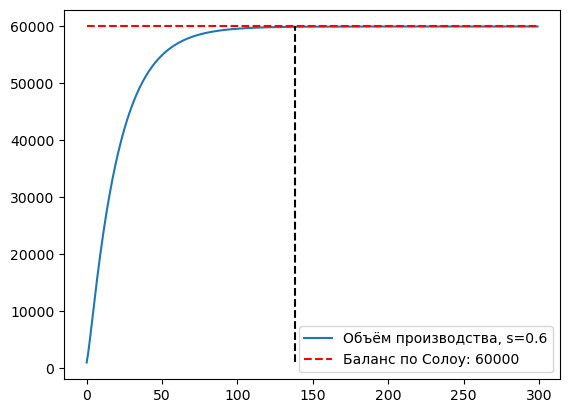

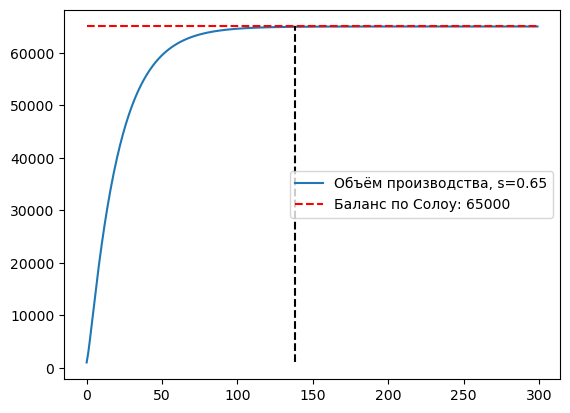

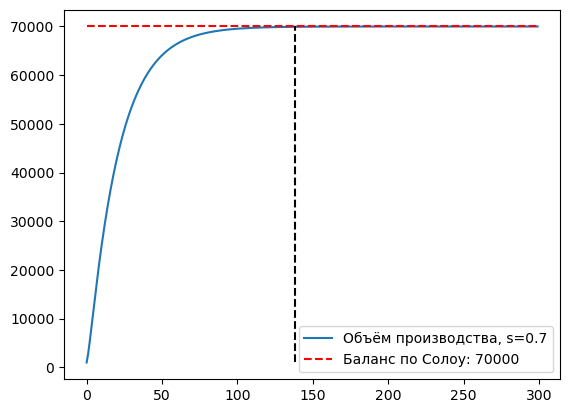

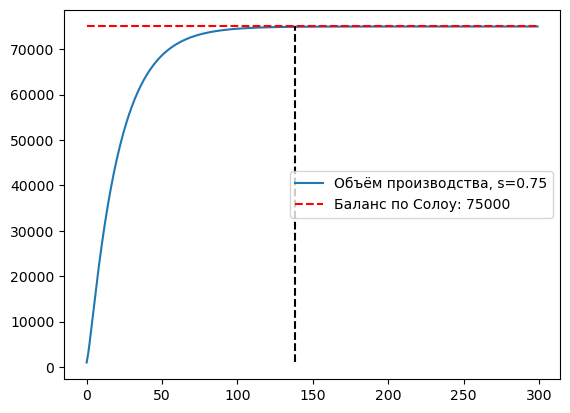

In [ ]:
s_vals = np.arange(0.05, 1, 0.05)
t_vals = []
eps = 0.001
for s in s_vals:
    rep_ = BananaRepublic(s=s)

    for _ in range(300):
        rep_.update()
        
    pred_line = (np.array([rep_.calcBalance()] * len(rep_.time[:-1])))
        
    diff = np.abs(pred_line - np.array(rep_.O)) / pred_line


    timeMoment = np.where(diff < eps)[0]
    if len(timeMoment) > 0:
        timeMoment = timeMoment[0]
        t_vals.append(timeMoment)
    else:
        t_vals.append(0)

    vertLine = [np.min(rep_.O), np.max(rep_.O)]

    plt.plot(rep_.time[:-1], rep_.O, label=f"Объём производства, s={np.round(s, 2)}")
    plt.plot(rep_.time[:-1], pred_line, '--r', label=f'Баланс по Солоу: {int(rep_.calcBalance())}')
    plt.plot([timeMoment, timeMoment], vertLine, '--k')
    plt.legend()
    plt.show()

Посмотрим на зависимость момента наступления равновесия $\tau$ от $s$ 

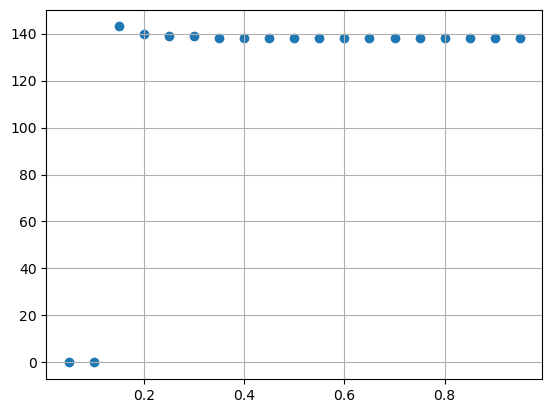

In [ ]:
plt.scatter(s_vals, t_vals)
plt.grid()

Заметим, что для достаточно маленьких значениях $s$ действительное значение объёмов производства не успело достичь равновесного значения с точностью $0.01\%$ за 300 производственных периодов (первые две точки на графике). Во всех же остальных случаях положение момента достижения равновесия практически не изменялось. Можно предположить, что при предельно низких значениях параметра $s$ момент достижения равновесия растёт, а при увеличении снижается и после некоторого момента достигает равновесия.

В нашем случае мы не достигаем равновесия за 300 итераций при значениях $s$ примерно до $0.1$. Заметим, что в нашей республике задано, что коэффициент нормы амортизации $d=0.1$ по умолчанию. Что не должно являться совпадением. При параметрах $s < d$ скорость прироста количества используемых машин будет меньше, чем скорость вывода машин из строя.

Сам же характер достижения равновесия во всех случаях одинаков: быстрорастущая функция, которая со временем выходит на насыщение. При разных $s$ лишь разный уровень объёма, так как зависимость $O^*(s)$ линейная